In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import os
from scipy.signal import find_peaks


In [3]:
# 寻找循环序列起始点, 给定递增或递减
def find_seq_start(seq, increase=True):
    seq = np.array(seq)
    seq_diff = np.diff(seq)
    if increase:
        start = np.where(seq_diff < 0)
    else:
        start = np.where(seq_diff > 0)
    start = start[0].tolist()
    if start[0] != 0:
        start.insert(0, 0) 
    return start
def plot_output(path, increase=False):
    df = pd.ExcelFile(path)
    sheets = df.sheet_names
    sheet = [i for i in sheets if 'List' in i][0]
    df = pd.read_excel(path, sheet_name=sheet)
    v,I = df.iloc[3:,0], df.iloc[3:,1]
    start = find_seq_start(v, increase=increase)
    fig, ax = plt.subplots()  
    ax.set_xlabel('Vd(V)')
    ax.set_ylabel('Id(A)')
    ax.invert_xaxis()
    ax.invert_yaxis()
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        ax.plot(v.iloc[s:e], I.iloc[s:e])
def get_output(path, increase=False):
    df = pd.ExcelFile(path)
    sheets = df.sheet_names
    sheet = [i for i in sheets if 'List' in i][0]
    df = pd.read_excel(path, sheet_name=sheet)
    v,I = df.iloc[3:,0], df.iloc[3:,1]
    start = find_seq_start(v, increase=increase)
    datas= []
    for i in range(len(start)-1):
        s,e = start[i], start[i+1]
        if s!=0:
            s = s+1
        datas.append([v.iloc[s:e], I.iloc[s:e]])
    return datas

def history_output(path):        
    file = os.listdir(path)
    fig,axs = plt.subplots(4,6,figsize=(20,10))
    fig.suptitle('Benchmark History: Output curve')
    for i in range(1,7):
        # 找c_i
        ci = [j for j in file if 'c'+str(i) in j]
        for j in range(len(ci)):
            datas = get_output(os.path.join(path,ci[j]))
            for k in range(len(datas)):
                axs[j,i-1].plot(datas[k][0], datas[k][1])

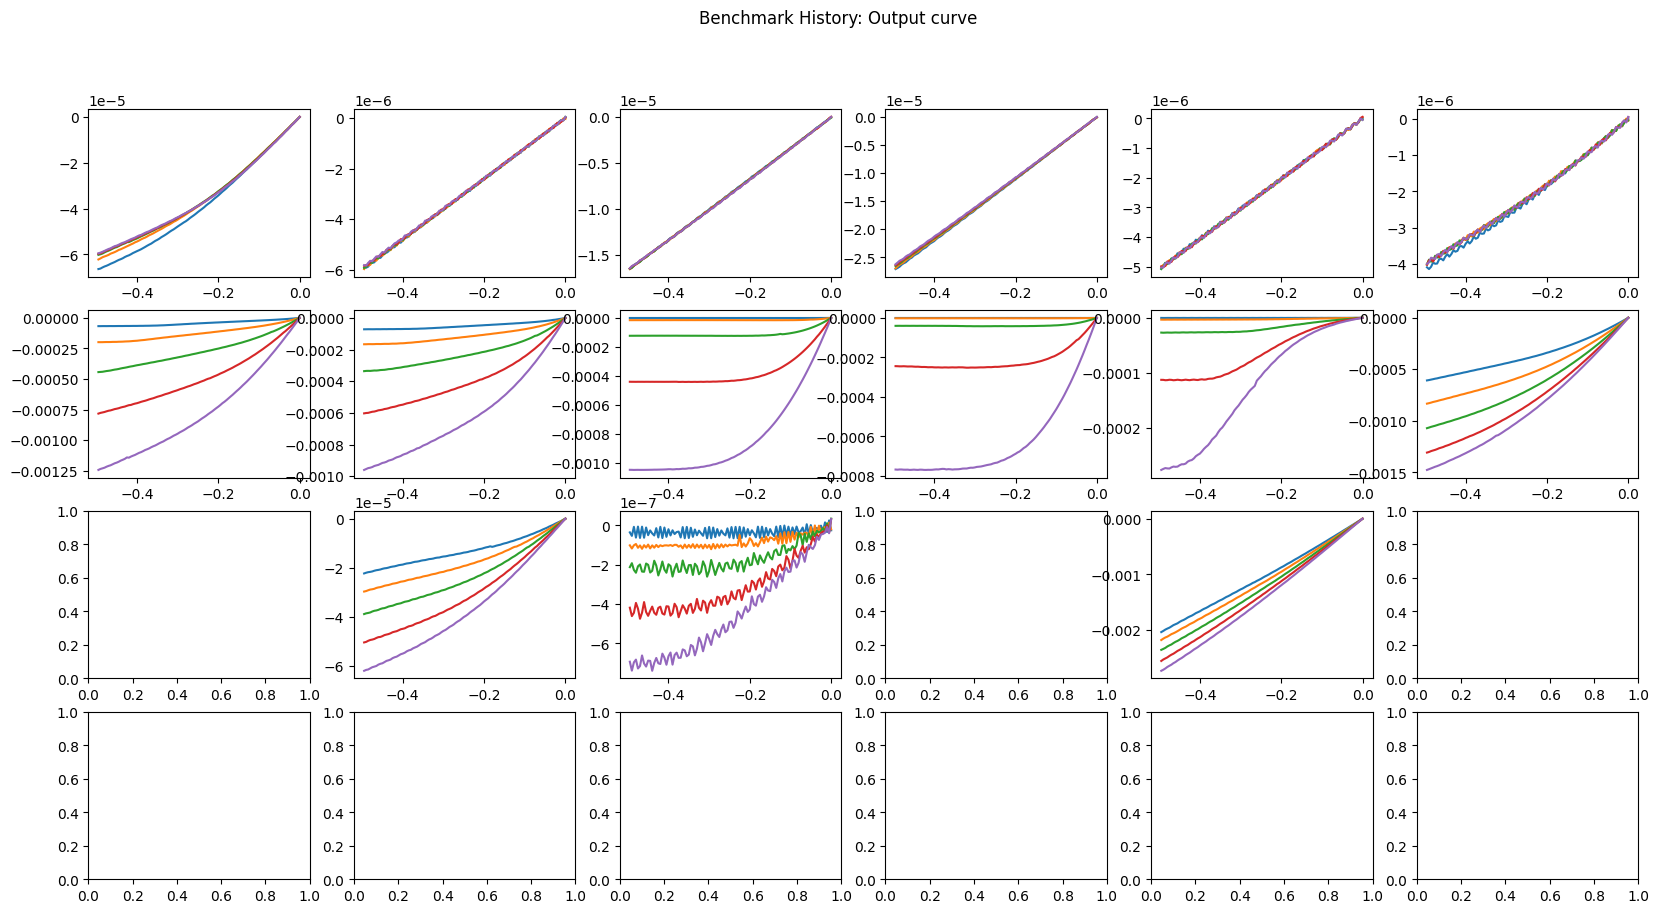

In [152]:
history_output(r'A:\project\OECT\b1500a\benchmark\sample4')

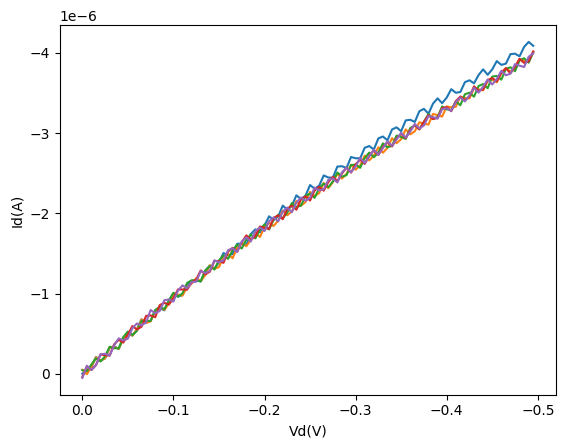

In [122]:
# plot output curve
plot_output(r'A:\project\OECT\b1500a\benchmark\sample4\20240419_c6_output.xlsx')

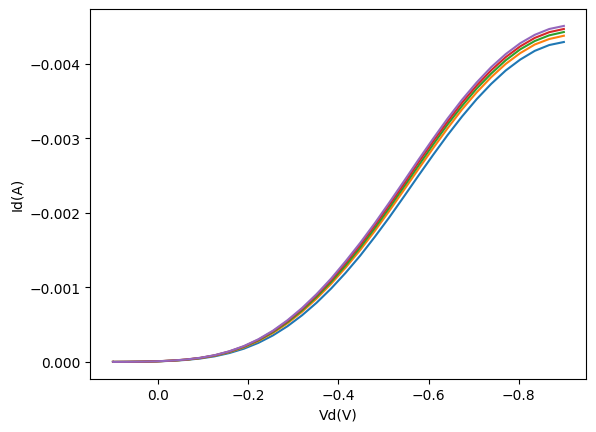

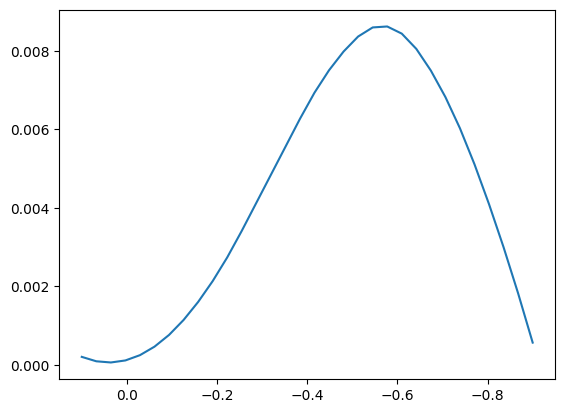

In [18]:
# plot output curve
plot_output(r'A:\project\OECT\b1500a\2024_4_26\1.xlsx', increase=False)
datas = get_output(r'A:\project\OECT\b1500a\2024_4_26\1.xlsx', increase=False)
x,y = datas[0]
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
x,y = np.array(x), np.array(y)
# Sort x and y
sort_idx = np.argsort(x)
x = x[sort_idx]
y = y[sort_idx]
from scipy import interpolate
import numpy as np
f = interpolate.UnivariateSpline(x, y, s=0.0000000001)
f_prime = f.derivative()
dy_dx = f_prime(x)
fig,ax= plt.subplots()
ax.invert_xaxis()
ax.plot(x,dy_dx)